In [ ]:
# Telco Customer Churn Analysis
'''
In this project, I analyze customer churn behavior in a telecom company.

The objective is to identify key factors that influence customer churn and extract actionable business insights.

Dataset: Telco Customer Churn
'''


In [1]:
import pandas as pd

df = pd.read_csv("/Users/benjaminbenlulu/Desktop/data-portfolio/WA_Fn-UseC_-Telco-Customer-Churn.csv")


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Charge Group        0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
## Overall Churn Rate

# First, I calculate the overall churn rate to understand the general retention situation of the company.


In [3]:
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 26.54%


In [ ]:
## Churn Rate by Contract Type
'''
Customers have different contract types:
- Month-to-month
- One year
- Two year

We want to examine how contract length impacts churn behavior.
'''

In [4]:
contract_churn = (
    df.groupby('Contract')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='Churn Rate')
)

print(contract_churn)


         Contract  Churn Rate
0  Month-to-month   42.709677
1        One year   11.269518
2        Two year    2.831858


In [16]:
## Churn by Monthly Charges Segment

# To better understand pricing impact, I divided customers into three pricing tiers:
# Low, Medium, and High monthly charges.


In [5]:
df['Charge Group'] = pd.qcut(df['MonthlyCharges'], 3, labels=['Low', 'Medium', 'High'])

In [6]:
charge_churn = (
    df.groupby('Charge Group')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='Churn Rate')
)

charge_churn


/var/folders/v3/xl0j_84577n22dbwg0l6txvw0000gn/T/ipykernel_2590/2547843443.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Charge Group')['Churn']


,Charge Group,Churn Rate
0,Low,15.865589
1,Medium,29.680171
2,High,34.086067


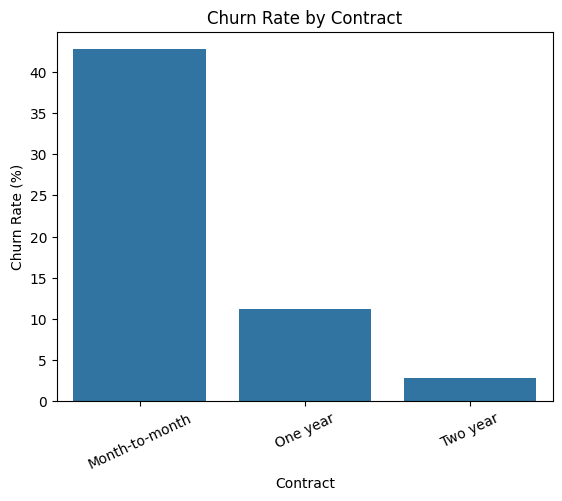

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=contract_churn, x='Contract', y='Churn Rate')
plt.title("Churn Rate by Contract")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=25)
plt.show()


In [15]:
### Insight

# Customers with month-to-month contracts show significantly higher churn rates.

# This suggests that long-term contracts improve customer retention.


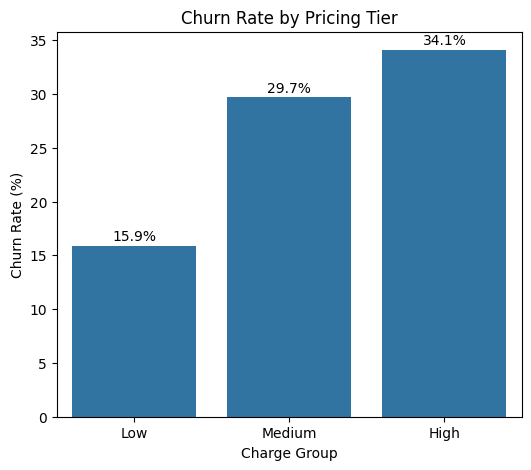

In [8]:
plt.figure(figsize=(6,5))

ax = sns.barplot(data=charge_churn,
                 x='Charge Group',
                 y='Churn Rate')

plt.title("Churn Rate by Pricing Tier")
plt.ylabel("Churn Rate (%)")

for i, value in enumerate(charge_churn['Churn Rate']):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center')

plt.show()


In [17]:
### Insight

# Higher-paying customers show increased churn rate.

# Possible reasons:
# - Price sensitivity
# - Competitive offers
# - Perceived lack of value


In [18]:
## Multi-Factor Analysis: Contract & Internet Service

# To deepen the analysis, I combined contract type and internet service type to identify interaction effects on churn.


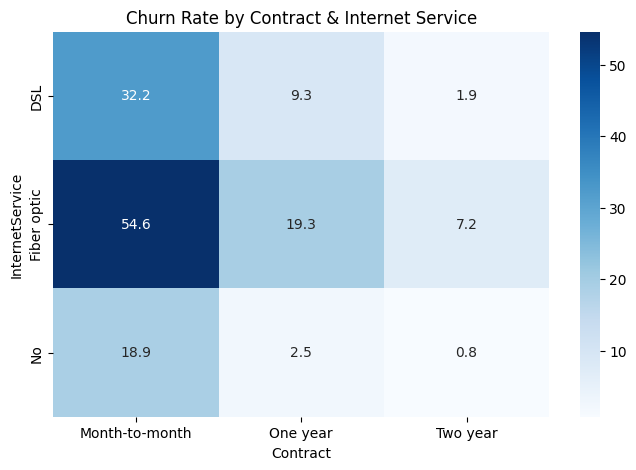

In [9]:
pivot = pd.pivot_table(
    df,
    values='Churn',
    index='InternetService',
    columns='Contract',
    aggfunc=lambda x: (x == 'Yes').mean() * 100
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")

plt.title("Churn Rate by Contract & Internet Service")
plt.show()


In [19]:
### Key Insight

# Customers with Fiber Optic + Month-to-Month contracts have the highest churn rate.

# This segment should be prioritized for retention strategies.
